In [2]:
import numpy as np
import pandas as pd
import os

np.random.seed(165)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

path="C:\\Users\jsciamma\Documents\Patrick\ML\Kaggle\HousePrices"
#path="C:\\Users\\Patrick\ML\HousePrices"
os.chdir(path)
os.getcwd()

train = pd.read_csv("data\\train.csv")
test = pd.read_csv("data\\test.csv")

In [3]:
traintrain = train.iloc[0:1168, ]
traintest = train.iloc[1168:, ]

In [54]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)
test.head()
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)
train.loc[train.index[0:1168],'Set']='traintrain'
train.loc[train.index[1168:],'Set']='traintest'
test['Set']='test'
full = pd.concat([train, test], )
full.reset_index(inplace=True)

In [51]:
full.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=2919)

In [57]:
# create dataframe with average sales price per neighborhood per sqft

full['lSalePrice'] = np.log(full.SalePrice)
full['lGrLivArea'] = np.log(full.GrLivArea)
MeanlSalePrice = full[full.Set=='traintrain'].groupby('Neighborhood').lSalePrice.agg(np.mean)
df_MeanlSalePrice = pd.DataFrame(MeanlSalePrice).reset_index().rename(columns={'lSalePrice':'MeanlSalePrice'})
df_MeanlSalePrice
full2 = pd.merge(full, df_MeanlSalePrice, on='Neighborhood', how='left')

In [58]:
# replace NAs with 0s where correct
full2.loc[np.isnan(full2.TotalBsmtSF), 'TotalBsmtSF'] = 0
full2.loc[np.isnan(full2.GarageArea), 'GarageArea'] = 0

In [59]:
full2.loc[full2.GarageQual.isnull(), 'GarageQual'] = 'NA'
full2.loc[full2.GarageCond.isnull(), 'GarageCond'] = 'NA'
full2.loc[full2.BsmtCond.isnull(), 'BsmtCond'] = 'NA'
full2.loc[full2.BsmtQual.isnull(), 'BsmtQual'] = 'NA'
full2.loc[full2.KitchenQual.isnull(), 'KitchenQual'] = 'NA'
full2.loc[full2.FireplaceQu.isnull(), 'FireplaceQu'] = 'NA'
full2.loc[full2.GarageFinish.isnull(), 'GarageFinish'] = 'NA'
cleanup_nums = {
    "GarageQual":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "GarageCond":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "LotShape":     {"Reg" : 0, "IR1": 1, "IR2": 2, "IR3": 3},
    "LandSlope":     {"Gtl" : 0, "Mod": 1, "Sev": 2},
    "ExterQual":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "ExterCond":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "BsmtCond":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "BsmtQual":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "HeatingQC":     {"Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "KitchenQual":     {"NA" : 0,"Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "FireplaceQu":     {"NA" : 0,"Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
    "GarageFinish":     {"NA" : 0,"Unf": 1, "RFn": 2, "Fin": 3},
}
t = full2.replace(cleanup_nums, inplace=False)
t.loc[:, list(cleanup_nums.keys())].info()

cleanup_nums.keys()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 12 columns):
GarageQual      2919 non-null int64
GarageCond      2919 non-null int64
LotShape        2919 non-null int64
LandSlope       2919 non-null int64
ExterQual       2919 non-null int64
ExterCond       2919 non-null int64
BsmtCond        2919 non-null int64
BsmtQual        2919 non-null int64
HeatingQC       2919 non-null int64
KitchenQual     2919 non-null int64
FireplaceQu     2919 non-null int64
GarageFinish    2919 non-null int64
dtypes: int64(12)
memory usage: 296.5 KB


dict_keys(['GarageQual', 'GarageCond', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish'])

In [60]:
for k in cleanup_nums.keys():
    full2.loc[:, k] = t.loc[:, k]


In [12]:
list(cleanup_nums.keys())

['GarageQual',
 'GarageCond',
 'LotShape',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish']

In [61]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns[mis_val_table_ren_columns['Missing Values'] != 0]

missing_values_table(full2)

,Missing Values,% of Total Values
Alley,2721,93.216855
BsmtExposure,82,2.809181
BsmtFinSF1,1,0.034258
BsmtFinSF2,1,0.034258
BsmtFinType1,79,2.706406
BsmtFinType2,80,2.740665
BsmtFullBath,2,0.068517
BsmtHalfBath,2,0.068517
BsmtUnfSF,1,0.034258
Electrical,1,0.034258


In [273]:
filter_col = [col for col in full if col.startswith('Bsmt')]

#full.loc[full.TotalBsmtSF ==0, filter_col].info()
full.Functional.value_counts()
import scipy.interpolate as sp
import pylab

fl = sp.interp1d(full[, y,kind='linear')



Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

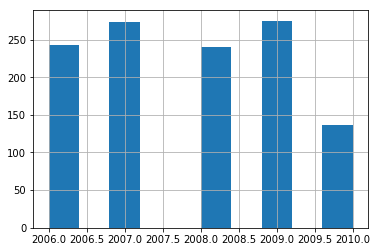

In [5]:
t_nonulls = traintrain.loc[:,traintrain.isnull().sum() == 0]
traintrain.YrSold.hist()

In [32]:
def create_dummies(x):
    y = x.drop('Neighborhood', axis=1).dropna(axis=1).loc[:, x.dtypes == object]
    return pd.get_dummies(y, columns=y.columns, drop_first=True)

def select_nonobjects(x):
    return x.dropna(axis=1).loc[:, x.dtypes != object]

def add_neighborhood_mean(x):
    return pd.DataFrame(index = x.index, data = x.groupby('Neighborhood').SalePrice.transform(np.mean)
                       ).rename(columns={'SalePrice':'Neighborhoodmean'})

def transform_data(x):
    return pd.concat([create_dummies(x),select_nonobjects(x), add_neighborhood_mean(x)], axis=1)

#x1 = create_dummies(traintrain)
#x2 = select_nonobjects(traintrain)
#x3 = add_neighborhood_mean(traintrain)

traintrain_transform = transform_data(traintrain)


In [33]:
traintrain_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Columns: 162 entries, MSZoning_FV to Neighborhoodmean
dtypes: float64(1), int64(35), uint8(126)
memory usage: 472.3 KB


In [199]:
#create_dummies(traintrain.drop('Neighborhood', axis=1)).corrwith(traintrain.SalePrice).sort_values(ascending=False)
t = traintrain_transform.corrwith(traintrain_transform.SalePrice).sort_values(ascending=False)
fields = t[abs(t) > 0.25].index
fields
def filter_data(traintrain_transform, fields):
    return traintrain_transform.loc[:, fields].drop('SalePrice', axis=1)

traintrain_transform_filter = filter_data(traintrain_transform, fields)
traintrain_transform_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 36 columns):
OverallQual              1168 non-null int64
Neighborhoodmean         1168 non-null float64
GrLivArea                1168 non-null int64
GarageCars               1168 non-null int64
GarageArea               1168 non-null int64
TotalBsmtSF              1168 non-null int64
1stFlrSF                 1168 non-null int64
FullBath                 1168 non-null int64
TotRmsAbvGrd             1168 non-null int64
YearBuilt                1168 non-null int64
YearRemodAdd             1168 non-null int64
Foundation_PConc         1168 non-null uint8
Fireplaces               1168 non-null int64
ExterQual_Gd             1168 non-null uint8
BsmtFinSF1               1168 non-null int64
SaleType_New             1168 non-null uint8
SaleCondition_Partial    1168 non-null uint8
2ndFlrSF                 1168 non-null int64
OpenPorchSF              1168 non-null int64
KitchenQual_Gd           1168 non-nu

In [200]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

lin_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression()),
])

lin_reg.fit(traintrain_transform_filter, np.log(traintrain.SalePrice))
lin_reg.score(traintrain_transform_filter,np.log(traintrain.SalePrice))

0.88897128750520316

## fillin some null values

In [66]:
full2.drop(fields, axis=1).loc[full2.MSZoning.isnull()].Neighborhood

1915     IDOTRR
2216     IDOTRR
2250     IDOTRR
2904    Mitchel
Name: Neighborhood, dtype: object

In [65]:
print(full2.loc[full2.Neighborhood == 'IDOTRR', 'MSZoning'].value_counts())
print(full2.loc[full2.Neighborhood == 'Mitchel', 'MSZoning'].value_counts())
print(full2.loc[:, 'MSZoning'].value_counts())

RM         68
C (all)    22
Name: MSZoning, dtype: int64
RL    104
RM      9
Name: MSZoning, dtype: int64
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


In [67]:
# fill missing Zoning with most common for neighborhood
full2.loc[(full2.MSZoning.isnull()) & (full2.Neighborhood == 'IDOTRR'), 'MSZoning'] = 'RM'
full2.loc[(full2.MSZoning.isnull()) & (full2.Neighborhood == 'Mitchel'), 'MSZoning'] = 'RL'

In [74]:
full2.drop(fields, axis=1).columns

Index(['Id', 'Alley', 'BldgType', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical',
       'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'FullBath',
       'Functional', 'GarageCars', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HouseStyle', 'KitchenAbvGr', 'LandContour',
       'LotConfig', 'LotFrontage', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MoSold', 'Neighborhood', 'PavedDrive',
       'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SalePrice', 'SaleType', 'Set', 'Street', 'TotRmsAbvGrd', 'Utilities',
       'YrSold', 'index', 'lSalePrice'],
      dtype='object')

In [82]:
pd.get_dummies(full2[full2.Set=='traintrain']
               .drop(fields, axis=1)
               .drop('Neighborhood', axis=1), drop_first=True).corrwith(full2[full2.Set=='traintrain'].lSalePrice).sort_values(ascending=False)

lSalePrice               1.000000
SalePrice                0.950157
GrLivArea                0.725025
GarageYrBlt              0.553972
Foundation_PConc         0.537565
BsmtFinType1_GLQ         0.436466
MasVnrArea               0.433632
GarageType_Attchd        0.410289
BsmtFinSF1               0.380959
LotFrontage              0.377901
CentralAir_Y             0.355478
Exterior1st_VinylSd      0.349087
SaleType_New             0.348409
Exterior2nd_VinylSd      0.348080
SaleCondition_Partial    0.342411
HalfBath                 0.326509
MasVnrType_Stone         0.326415
Electrical_SBrkr         0.319746
PavedDrive_Y             0.313089
MSZoning_RL              0.306724
HouseStyle_2Story        0.277771
BsmtExposure_Gd          0.255236
GarageType_BuiltIn       0.247959
BsmtFullBath             0.232673
MasVnrType_BrkFace       0.231069
BsmtUnfSF                0.221787
RoofStyle_Hip            0.194446
Functional_Typ           0.141355
RoofMatl_WdShngl         0.132735
LotConfig_CulD

In [102]:
dummies = pd.get_dummies(data=full2.loc[:, ['Foundation', 'MSZoning']],  drop_first=True)
dummycolumns=dummies.columns


In [104]:
## add dummies
full2 = pd.concat([full2, dummies], axis=1)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# linear regression playground
fields = (['lGrLivArea','MeanlSalePrice', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'LotArea', 
          'YearBuilt', 'YearRemodAdd', 'MiscVal', 'LowQualFinSF', 'Fireplaces',
         'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
         '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'GarageCars', 'FullBath', 'TotRmsAbvGrd'] 
          + list(cleanup_nums.keys())
          + list(dummycolumns)
         )
#fields = ['lGrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'LotArea', 
#          'YearBuilt', 'YearRemodAdd', 'MiscVal', '1stFlrSF', ]
X = full2.loc[full2.Set=='traintrain', fields]
y = full2.loc[full2.Set=='traintrain', 'lSalePrice']
simple_lin_reg=LinearRegression()
simple_lin_reg.fit(X, y)
print("score on training set", simple_lin_reg.score(X, y))
a = np.sqrt(-cross_val_score(simple_lin_reg, X, y, cv=10, scoring="neg_mean_squared_error"))
print("cross val score", a)
print("mean cross val score", a.mean())



score on training set 0.904870317128
cross val score [ 0.1204839   0.1157719   0.13546941  0.13868961  0.17964843  0.15784667
  0.132494    0.10275548  0.13360766  0.1111405 ]
mean cross val score 0.132790756695


In [12]:
full2.loc[:, fields + list(cleanup_nums.keys())].info()

NameError: name 'fields' is not defined

In [111]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=200)
RF_reg.fit(X, y)
print("score on training set", RF_reg.score(X, y))

a = np.sqrt(-cross_val_score(RF_reg, X, y, cv=10, scoring="neg_mean_squared_error"))
print(a)
print(a.mean())

score on training set 0.981524223558
[ 0.15344073  0.13086281  0.1293691   0.16381078  0.18008163  0.16903769
  0.1349334   0.12029299  0.1397937   0.14318493]
0.146480774482


In [ ]:
?lin_reg.score

In [349]:
np.sqrt(-cross_val_score(lin_reg, traintrain_transform_filter, np.log(traintrain.SalePrice), cv=10, scoring="neg_mean_squared_error"))


array([ 0.14043358,  0.11788848,  0.12877539,  0.14998949,  0.20571224,
        0.14983411,  0.13013122,  0.12444642,  0.13122425,  0.11989735])

In [17]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators=100)
RF_reg.fit(traintrain_transform_filter, np.log(traintrain.SalePrice))
RF_reg.score(traintrain_transform_filter,np.log(traintrain.SalePrice))


NameError: name 'traintrain_transform_filter' is not defined

In [213]:
def cross_val(model, data, price):
    return np.sqrt(-cross_val_score(model, data, np.log(price), cv=10, scoring="neg_mean_squared_error"))

cross_val(RF_reg, traintrain_transform_filter, traintrain.SalePrice)

array([ 0.15650366,  0.13661451,  0.13505355,  0.17325113,  0.1759403 ,
        0.17156008,  0.12397048,  0.11709869,  0.13120117,  0.13065087])

## Test

In [113]:
X = full2.loc[full2.Set=='traintest', fields]
y = full2.loc[full2.Set=='traintest', 'lSalePrice']
predicted = simple_lin_reg.predict(X)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y, predicted))

0.17082827570942632

In [203]:
d = pd.DataFrame((traintrain.groupby('Neighborhood')
                  .SalePrice.agg(np.mean))
                 .reset_index()
                 .rename(columns={'SalePrice': 'Neighborhoodmean'})
                )
traintest_transform = pd.merge(traintest, d, on='Neighborhood', how='left')
traintest_transform = pd.concat([create_dummies(traintest_transform),select_nonobjects(traintest_transform)], axis=1)
traintest_transform_filter = filter_data(traintest_transform, fields)
traintest_transform_filter.Electrical_SBrkr = 0
traintest_transform_filter.info()
#traintest_transform_filter
#traintrain.Neighborhood
#print(traintest.loc[:, ['Id','Neighborhood']])
#print(d)
#print(traintest_transform.loc[0:10, ['Id','Neighborhood', 'Neighborhoodmean']])
#pd.merge(traintest.loc[:, ['Id','Neighborhood']], d, on='Neighborhood', how='left')
#traintest.loc[traintest.index[0:10], ['Id','Neighborhood']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 36 columns):
OverallQual              292 non-null int64
Neighborhoodmean         292 non-null float64
GrLivArea                292 non-null int64
GarageCars               292 non-null int64
GarageArea               292 non-null int64
TotalBsmtSF              292 non-null int64
1stFlrSF                 292 non-null int64
FullBath                 292 non-null int64
TotRmsAbvGrd             292 non-null int64
YearBuilt                292 non-null int64
YearRemodAdd             292 non-null int64
Foundation_PConc         292 non-null uint8
Fireplaces               292 non-null int64
ExterQual_Gd             292 non-null uint8
BsmtFinSF1               292 non-null int64
SaleType_New             292 non-null uint8
SaleCondition_Partial    292 non-null uint8
2ndFlrSF                 292 non-null int64
OpenPorchSF              292 non-null int64
KitchenQual_Gd           292 non-null uint8
Exterior1st_V

In [188]:
list(zip(traintrain_transform_filter.columns, traintest_transform_filter.columns))

[('OverallQual', 'OverallQual'),
 ('Neighborhoodmean', 'Neighborhoodmean'),
 ('GrLivArea', 'GrLivArea'),
 ('GarageCars', 'GarageCars'),
 ('GarageArea', 'GarageArea'),
 ('TotalBsmtSF', 'TotalBsmtSF'),
 ('1stFlrSF', '1stFlrSF'),
 ('FullBath', 'FullBath'),
 ('TotRmsAbvGrd', 'TotRmsAbvGrd'),
 ('YearBuilt', 'YearBuilt'),
 ('YearRemodAdd', 'YearRemodAdd'),
 ('Foundation_PConc', 'Foundation_PConc'),
 ('Fireplaces', 'Fireplaces'),
 ('ExterQual_Gd', 'ExterQual_Gd'),
 ('BsmtFinSF1', 'BsmtFinSF1'),
 ('SaleType_New', 'SaleType_New'),
 ('SaleCondition_Partial', 'SaleCondition_Partial'),
 ('2ndFlrSF', '2ndFlrSF'),
 ('OpenPorchSF', 'OpenPorchSF'),
 ('KitchenQual_Gd', 'KitchenQual_Gd'),
 ('Exterior1st_VinylSd', 'Exterior1st_VinylSd'),
 ('Exterior2nd_VinylSd', 'Exterior2nd_VinylSd'),
 ('WoodDeckSF', 'WoodDeckSF'),
 ('HalfBath', 'HalfBath'),
 ('LotArea', 'LotArea'),
 ('HouseStyle_2Story', 'HouseStyle_2Story'),
 ('CentralAir_Y', 'CentralAir_Y'),
 ('Electrical_SBrkr', 'Electrical_SBrkr'),
 ('MSZoning_RL',

In [204]:
lin_reg.score(traintest_transform_filter,np.log(traintest.SalePrice))

0.75309416143645114

In [177]:
traintest_transform_filter.corrwith(other=traintest.SalePrice)

OverallQual        NaN
Neighborhoodmean   NaN
GrLivArea          NaN
dtype: float64

In [205]:
predicted = lin_reg.predict(traintest_transform_filter)

In [206]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(np.log(traintest.SalePrice), predicted))

0.19433769075736232

In [214]:
predicted_RF = RF_reg.predict(traintest_transform_filter)
np.sqrt(mean_squared_error(np.log(traintest.SalePrice), predicted_RF))

0.15249549910457461

## Submission

In [83]:
traintest2['Neighborhoodmean'].describe()

count       292.000000
mean     180046.040837
std       55092.167599
min       97120.000000
25%      136448.312500
50%      186082.196078
75%      198519.662219
max      318783.571429
Name: Neighborhoodmean, dtype: float64

In [84]:
# re-create full training set
full = pd.concat([traintrain, traintest2])
# re-fit on full set
final_lin_reg = LinearRegression()
final_lin_reg.fit(full[fields], np.log(full.SalePrice))
final_lin_reg.score(full[fields],np.log(full.SalePrice))

0.81129268196318038

In [85]:
# add neighborhood means
test2 = pd.merge(test, d, on='Neighborhood')

In [68]:
test2.groupby('Neighborhood').mean().loc[:, 'Neighborhoodmean']

Neighborhood
Blmngtn    192688.466667
Blueste    137500.000000
BrDale     104408.333333
BrkSide    124355.000000
ClearCr    214159.666667
CollgCr    197831.855932
Crawfor    200583.081081
Edwards    127176.923077
Gilbert    191401.937500
IDOTRR     100914.545455
MeadowV     97120.000000
Mitchel    160809.081081
NAmes      145927.629213
NPkVill    144714.285714
NWAmes     190498.272727
NoRidge    318783.571429
NridgHt    318458.485294
OldTown    128869.544444
SWISU      142416.700000
Sawyer     136448.312500
SawyerW    186082.196078
Somerst    227530.575758
StoneBr    314107.608696
Timber     243325.964286
Veenker    233250.000000
Name: Neighborhoodmean, dtype: float64

In [86]:
test2[fields].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 5 columns):
Neighborhoodmean    1459 non-null float64
GrLivArea           1459 non-null int64
OverallQual         1459 non-null int64
YearBuilt           1459 non-null int64
YearRemodAdd        1459 non-null int64
dtypes: float64(1), int64(4)
memory usage: 68.4 KB


In [87]:
test2predicted = np.exp(lin_reg.predict(test2[fields]))

In [88]:
df = pd.DataFrame(index=test2.Id, data=test2predicted, columns=['SalePrice'])

In [35]:
df

,SalePrice
Id,
1461,116467.605664
1462,137639.237889
1470,115840.343478
1471,138064.631105
1510,132584.454470
1511,131413.382966
1512,147592.326017
1513,163477.188381
1514,160540.132254


## Simple submission

In [117]:
# re-fit on full set
X = full2.loc[(full2.Set=='traintrain') | (full2.Set=='traintest'), fields]
y = full2.loc[(full2.Set=='traintrain') | (full2.Set=='traintest'),  'lSalePrice']
simple_lin_reg=LinearRegression()
simple_lin_reg.fit(X, y)
?simple_lin_reg

In [122]:
X = full2.loc[(full2.Set=='test') , fields]
predicted = np.exp(simple_lin_reg.predict(X))
#predicted = simple_lin_reg.predict(X)
df = pd.DataFrame(index=full2.loc[(full2.Set=='test') , fields].index, data=predicted, columns=['SalePrice'])
df.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [162]:
np.exp(simple_lin_reg.intercept_+simple_lin_reg.coef_.reshape(1,44).dot(X.T))
simple_lin_reg.predict(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
if True:
    df.to_csv("output\\result_20171120_2327.csv")